In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score


# Load Dataset


In [26]:
df = pd.read_csv("youtube_data.csv")


In [27]:
df.head()

,rank,Video,Video views,Likes,Dislikes,Category,published
0,1,Lil Nas X - Old Town Road (Official Movie) ft....,"54,071,677","3,497,955","78,799",Music,2019
1,2,"20 Tennis shots if they were not filmed, NOBOD...","3,471,237","19,023",859,NaN,2017
2,3,JoJo Siwa - Karma (Official Video),"34,206,747","293,563",NaN,Music,2024
3,4,David Kushner - Daylight (Official Music Video),"18,558,390","680,732",NaN,Music,2023
4,5,Wiz Khalifa - See You Again ft. Charlie Puth [...,"6,547,981,039","44,428,537",NaN,Music,2015


# Data Cleaning:

In [28]:

# Data Cleaning: Convert comma-separated numbers to integers
df["Video views"] = df["Video views"].str.replace(",", "").astype(int)
df["Likes"] = df["Likes"].str.replace(",", "").astype(int)



In [8]:
df.head()

,rank,Video,Video views,Likes,Dislikes,Category,published
0,1,Lil Nas X - Old Town Road (Official Movie) ft....,54071677,3497955,"78,799",Music,2019
1,2,"20 Tennis shots if they were not filmed, NOBOD...",3471237,19023,859,NaN,2017
2,3,JoJo Siwa - Karma (Official Video),34206747,293563,NaN,Music,2024
3,4,David Kushner - Daylight (Official Music Video),18558390,680732,NaN,Music,2023
4,5,Wiz Khalifa - See You Again ft. Charlie Puth [...,6547981039,44428537,NaN,Music,2015


# Define Features & Target


In [10]:
# Define Features & Target
X = df[["Likes"]].values  # Independent variable
y = df["Video views"].values  # Dependent variable



# Split Data


In [11]:
# Split Data (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Train Model

In [17]:
# Train Model
model = LinearRegression()
model.fit(X_train, y_train)



LinearRegression()

# Predict

In [24]:
# Predict
y_pred = model.predict(X_test)
#y_pred



# Evaluate Model

In [21]:
# Evaluate Model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"R² Score: {r2:.4f}")



Mean Absolute Error: 58533588.49
R² Score: 0.7634


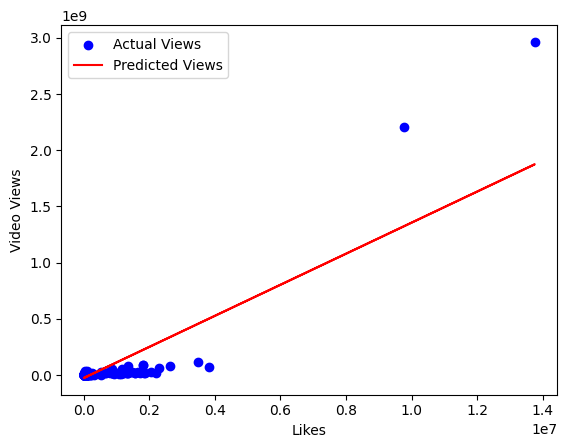

In [22]:
# Plot
plt.scatter(X_test, y_test, color='blue', label="Actual Views")
plt.plot(X_test, y_pred, color='red', label="Predicted Views")
plt.xlabel("Likes")
plt.ylabel("Video Views")
plt.legend()
plt.show()
